In [5]:
# !pip install sklearn
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas

In [20]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# 1- Continuous and Categorical Features

In [15]:
''' 3 CATEGORICAL FEATURE'''
df_cat = df_train[["HeatingQC", "KitchenQual", "LotShape"]]
df_cat.head()

,HeatingQC,KitchenQual,LotShape
0,Ex,Gd,Reg
1,Ex,TA,Reg
2,Ex,Gd,IR1
3,Gd,Gd,IR1
4,Ex,Gd,IR1


In [17]:
''' 3 CONTINUOUS FEATURE'''
df_cont = df_train[['TotalBsmtSF', 'SalePrice', 'GarageArea']]
df_cont.head()

,TotalBsmtSF,SalePrice,GarageArea
0,856,208500,548
1,1262,181500,460
2,920,223500,608
3,756,140000,642
4,1145,250000,836


[Text(0.5, 1.0, 'Frequency Histogram for Continous feature')]

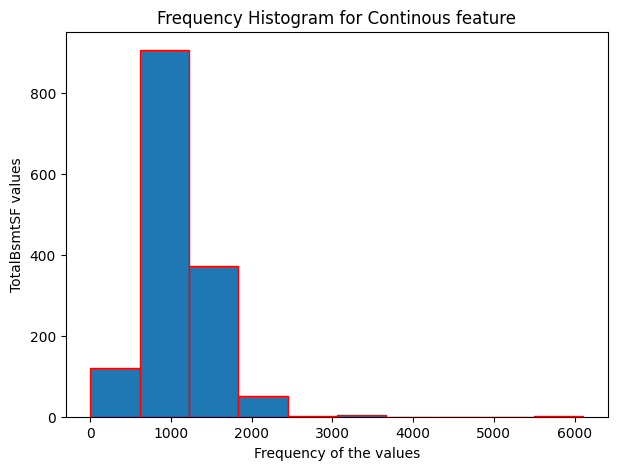

In [18]:
'''1 CONTINOUS FEATURE DATA PLOTING'''
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
## addd bar boundary 
# Plot Histogram on x
plt.hist(df_train['TotalBsmtSF'], bins = 10, align='mid', edgecolor="red")
plt.xlabel('Frequency of the values')
plt.ylabel('TotalBsmtSF values')
plt.gca().set(title='Frequency Histogram for Continous feature')



[Text(0.5, 1.0, 'Frequency Histogram for Continous feature')]

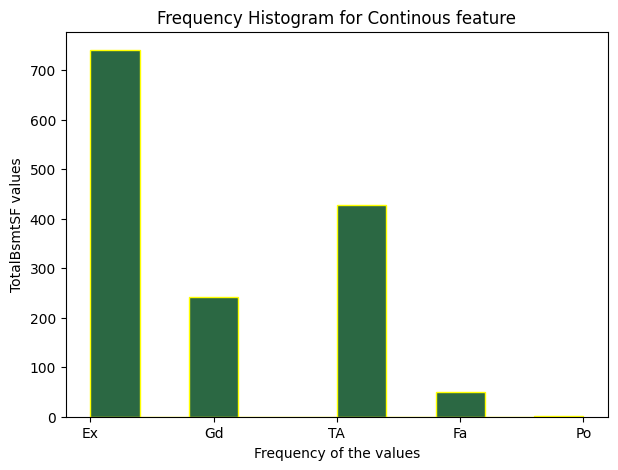

In [19]:
'''1 CATEGORICAL FEATURE DATA PLOTING'''
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
## addd bar boundary 
# Plot Histogram on x
plt.hist(df_train['HeatingQC'], align='mid', edgecolor="yellow", color = '#2B6843')
plt.xlabel('Frequency of the values')
plt.ylabel('TotalBsmtSF values')
plt.gca().set(title='Frequency Histogram for Continous feature')


# 2- Data Preprocessing and Feature Selection

In [5]:
'''CHECK COLUMNS WITH NULL VALUES AND DROP THEM'''
vars_with_na = [var for var in df_train.columns if df_train[var].isnull().sum() > 0]
vars_with_na1 = [var for var in df_test.columns if df_test[var].isnull().sum() > 0]
print (vars_with_na, vars_with_na1)

df_train = df_train.dropna(axis = 1)
df_train.duplicated().sum(), df_test.duplicated().sum()

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'] ['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [21]:
'''PERFORMED MUTUAL INFO REGRESSION FOR FEARURE SELECTION'''

def make_mi_score(x,y):
    for colname in x.select_dtypes(['object','category']): # taking data type
        x[colname], _ = x[colname].factorize() 
        
        
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in x.dtypes]
    # All discrete features should now have integer dtypes
    mi_score = mutual_info_regression(x,y,discrete_features=discrete_features,random_state=0)
    mi_score = pd.Series(mi_score,name='Mutual Information Score',index=x.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score


x = df_train.copy()
x = x.drop('Id', axis = 1)
y = x.pop('SalePrice')

mi_score = make_mi_score(x,y)
mi_score

OverallQual      5.714348e-01
Neighborhood     5.272377e-01
GarageArea       4.999292e-01
GrLivArea        4.325040e-01
YearBuilt        4.097242e-01
TotalBsmtSF      3.971638e-01
LotArea          3.941277e-01
GarageCars       3.639206e-01
ExterQual        3.246676e-01
KitchenQual      3.198543e-01
1stFlrSF         2.829883e-01
MSSubClass       2.817190e-01
YearRemodAdd     2.764641e-01
FullBath         2.679707e-01
TotRmsAbvGrd     2.164973e-01
Foundation       1.990363e-01
OpenPorchSF      1.925948e-01
HeatingQC        1.679056e-01
Fireplaces       1.656083e-01
Exterior2nd      1.619401e-01
2ndFlrSF         1.595238e-01
BsmtFinSF1       1.524427e-01
Exterior1st      1.319800e-01
BsmtUnfSF        1.246812e-01
MSZoning         1.230096e-01
OverallCond      1.124979e-01
WoodDeckSF       1.086951e-01
LotShape         9.315045e-02
SaleCondition    8.104959e-02
SaleType         8.081031e-02
HalfBath         8.059287e-02
HouseStyle       8.026861e-02
BedroomAbvGr     7.299114e-02
CentralAir

Index(['OverallQual', 'Neighborhood', 'GarageArea', 'GrLivArea', 'YearBuilt',
       'TotalBsmtSF', 'LotArea', 'GarageCars', 'ExterQual', 'KitchenQual',
       '1stFlrSF', 'MSSubClass', 'YearRemodAdd', 'FullBath', 'TotRmsAbvGrd'],
      dtype='object')

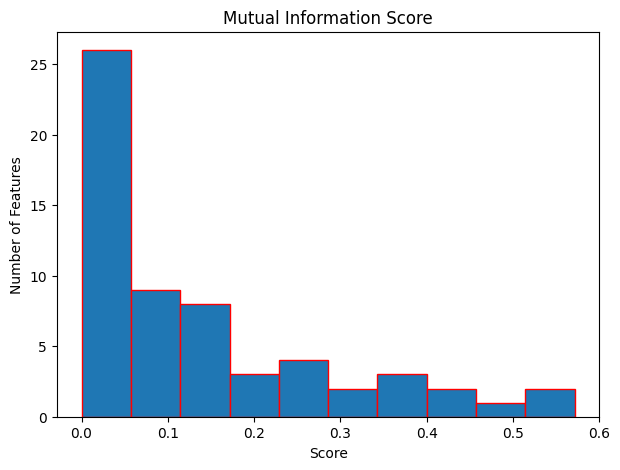

In [22]:
'''VISUALIZATION MI SCORE FOR EACH FEATURE'''
''' SLECTING FEATURE WHERE MI SCORE IS GREATER THAN 0.2'''

import matplotlib.pyplot as plt
mi_score1 = pd.DataFrame(mi_score)
plt.hist(mi_score1['Mutual Information Score'], edgecolor = 'red')
plt.title('Mutual Information Score')
plt.xlabel('Score')
plt.ylabel('Number of Features')
df = mi_score1[mi_score1.iloc[:, -1] >0.2]
df = df.squeeze()
df.keys()


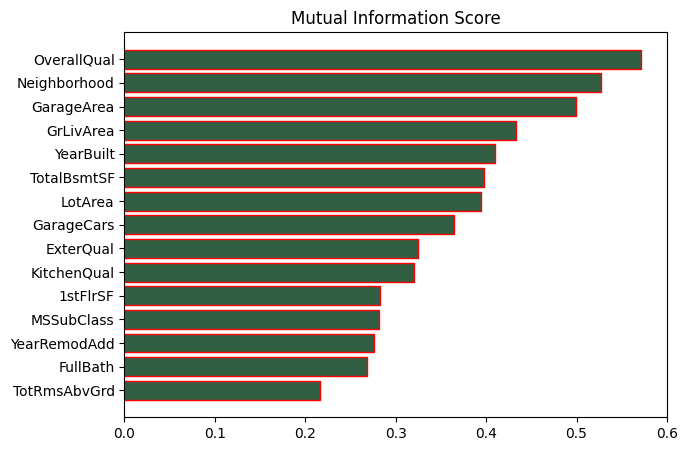

In [43]:
def plot_mi_score(score):
    score = score.sort_values(ascending = True)
    width = np.arange(len(score))
    ticks = list(score.index)
    plt.barh(width,score, color = '#325F44', edgecolor = 'red')
    plt.yticks(width,ticks)
    plt.title('Mutual Information Score')

plot_mi_score(df)

In [24]:
train_data = df_train[['OverallQual', 'Neighborhood', 'GarageArea', 'GrLivArea', 'YearBuilt',
       'TotalBsmtSF', 'LotArea', 'GarageCars', 'ExterQual', 'KitchenQual',
       '1stFlrSF', 'MSSubClass', 'YearRemodAdd', 'FullBath', 'TotRmsAbvGrd','SalePrice']]

test_data = df_test[['OverallQual', 'Neighborhood', 'GarageArea', 'GrLivArea', 'YearBuilt',
       'TotalBsmtSF', 'LotArea', 'GarageCars', 'ExterQual', 'KitchenQual',
       '1stFlrSF', 'MSSubClass', 'YearRemodAdd', 'FullBath', 'TotRmsAbvGrd']]

# 3- ONE HOT ENCODING

In [71]:
one_hot_encoded_data  = pd.get_dummies(df_train, columns = ['PavedDrive'], prefix = 'Paves')
one_hot_encoded_data['Paves_N'].value_counts(), one_hot_encoded_data['Paves_Y'].value_counts(), one_hot_encoded_data['Paves_P'].value_counts()

(0    1370
 1      90
 Name: Paves_N, dtype: int64,
 1    1340
 0     120
 Name: Paves_Y, dtype: int64,
 0    1430
 1      30
 Name: Paves_P, dtype: int64)

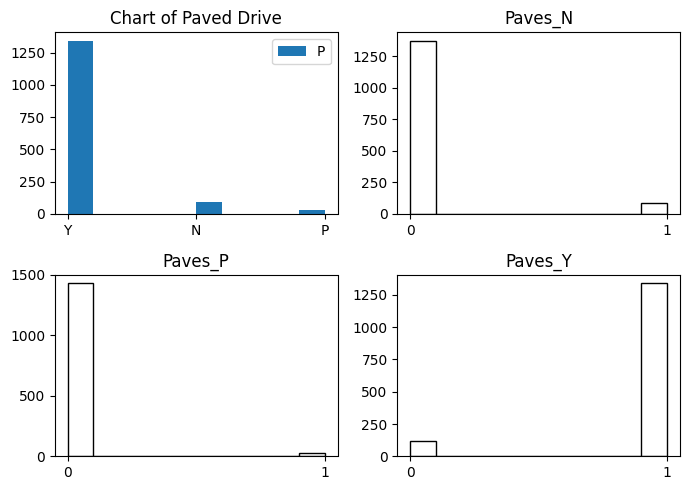

In [73]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.hist(df_train['PavedDrive'], fill=True)
ax0.legend('Paved Drive')
ax0.set_title('Chart of Paved Drive')

ax1.hist(one_hot_encoded_data['Paves_N'], fill=False)
ax1.set_xticks([0,1])
ax1.set_title('Paves_N')

ax2.hist(one_hot_encoded_data['Paves_P'], fill=False)
ax2.set_title('Paves_P')
ax2.set_xticks([0,1])

# Make a multiple-histogram of data-sets with different length.
ax3.hist(one_hot_encoded_data['Paves_Y'], fill=False)
ax3.set_title('Paves_Y')
ax3.set_xticks([0,1])

fig.tight_layout()
plt.show()

# Training Model (OLS from SCRATCH)

## Label Encoding

In [25]:
le = LabelEncoder()
for col in train_data.columns:
    if train_data[col].dtypes == 'O':
        train_data[col] = le.fit_transform(train_data[col])

## Removing Outliers

In [27]:
''''''

from scipy import stats

z_scores = stats.zscore(train_data)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

train_data = train_data[filtered_entries]

## Model Training OLS

In [28]:
#we need to normalize the features using mean normalization

#we need to normalize the features using mean normalization
my_data = (train_data - train_data.mean())/train_data.std()
y1 = my_data['SalePrice'].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
x1 = my_data.drop('SalePrice',axis =1).values
bias = np.zeros(x1.shape[1])
X_train1, X_val1, y_train1, y_val1 = train_test_split(x1, y1, test_size=0.1)
ones = np.ones([x1.shape[0],1])
x1 = np.concatenate((ones,x1),axis=1)

theta = np.zeros([1,3])

#set hyper parameters
alpha = 0.01
iters = 1000


In [29]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list
def predict(X, w, b):
    return X.dot(w) + b
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2


In [41]:
w, b, c= GradientDescent(X_train1,y_train1 , bias, 0, 0.002,epochs=350)

Cost is: 0.4823361408205987
Cost is: 0.2714089408855964
Cost is: 0.1758118652801552
Cost is: 0.13211778118360087
Cost is: 0.11181812294789242
Cost is: 0.10209366522579555
Cost is: 0.09717567433742205
Cost is: 0.09446461400916822
Cost is: 0.09278616011249269
Cost is: 0.09160743367978379


Text(0.5, 0, 'Epochs')

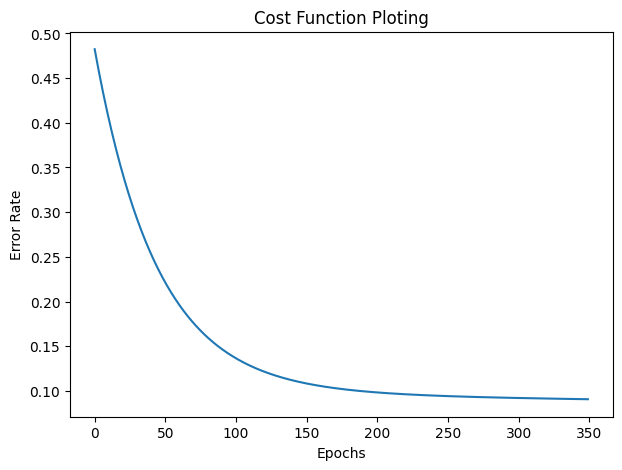

In [42]:
plt.plot(c)
plt.title('Cost Function Ploting')
plt.ylabel('Error Rate')
plt.xlabel('Epochs')

## Model Evaluation

In [54]:

def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(X_val1, w, b)


## For test data
# y_pred = predict(Xtest, w, b)
print("R2 Score is : ", r2score(y_pred, y_val1))

R2 Score is :  0.8195535874027529


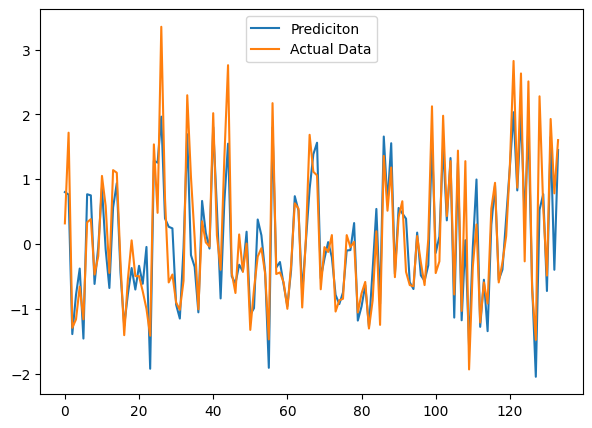

In [46]:
plt.plot(y_pred, label = 'Prediciton')
plt.plot(y_val1, label = 'Actual Data')
plt.legend()

In [52]:
def mean_square_error(y_train, y_pred):
    return np.sqrt(np.square(sum(((y_train - y_pred))/len(y_train))))


print("RMSE:", mean_square_error(y_pred, y_val1))

RMSE: 0.06937254497365955


# Tesing model performance on test data
- Droping Null and Duplicated Values

In [55]:
test_data.isnull().sum()

OverallQual     0
Neighborhood    0
GarageArea      1
GrLivArea       0
YearBuilt       0
TotalBsmtSF     1
LotArea         0
GarageCars      1
ExterQual       0
KitchenQual     1
1stFlrSF        0
MSSubClass      0
YearRemodAdd    0
FullBath        0
TotRmsAbvGrd    0
dtype: int64

In [56]:
test_data = test_data.dropna()

In [57]:
test_data.duplicated().sum()

4

In [58]:
test_data = test_data.drop_duplicates()

In [59]:
'''Label Encoding on Test Data'''
le = LabelEncoder()
for col in test_data.columns:
    if test_data[col].dtypes == 'O':
        test_data[col] = le.fit_transform(test_data[col])

In [60]:
'''Removing Outliers '''
z_scores = stats.zscore(test_data)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

test_data = test_data[filtered_entries]

In [63]:
my_data1 = np.sqrt(np.square((test_data - test_data.mean())/test_data.std()))
y_pred1 = predict(my_data1, w, b)

In [70]:
print("Model Price prediction on test data\n", y_pred1)

Model Price prediction on test data
 0       0.780080
1       0.528060
2       0.497771
3       0.335213
4       0.660251
          ...   
1454    1.246447
1455    0.919097
1456    0.657345
1457    0.838062
1458    0.833658
Length: 1312, dtype: float64
